<a href="https://colab.research.google.com/github/KDev-Huh/Deep_learning/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%9B%88%EB%A0%A8_%EB%85%B8%ED%95%98%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
# 하이퍼파라미터를 수정하여 모델 튜닝하기
sgd2 = SGDClassifier(loss='hinge', random_state=42)
sgd2.fit(x_train_all, y_train_all)
sgd2.score(x_test, y_test)

0.9385964912280702

<h3>테스트 세트로 모델을 튜닝하면 테스트세트에 적합한 모델이 되어 테스트 세트의 정보가 모델에 새어 나가게 된다. 따라서 테스트 세트로 튜닝하는것이 아닌 검증세트를 만들어 검증세트로 튜닝을 하면 된다.👻</h3>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

<h3>먼저 훈련과 테스트 세트를 8:2로 나누고 훈련 세트에서 훈련과 검증으로 8:2로 나누면 된다.</h3>

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train),len(x_val))

364 91


In [ ]:
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

<h1>스케일을 조정하지 않고 모델 훈련하기</h1>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

['mean perimeter' 'mean area']


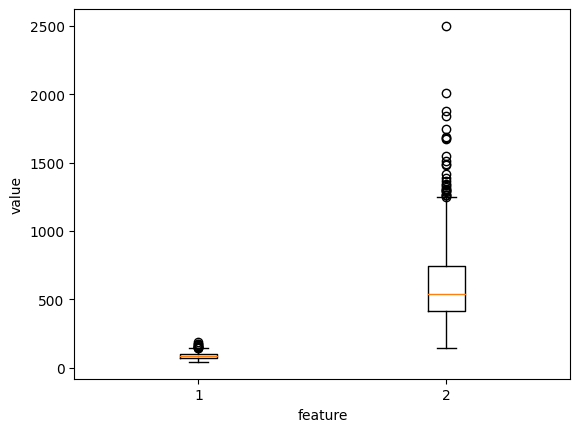

In [ ]:
print(cancer.feature_names[[2, 3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
class SingleLayer:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses=[]
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 정방향 계산
    return  z

  def backprop(self, x, err):
    w_grad = x * err    # 가중치 업데이트
    b_grad = 1 * err    # 절편 업데이트
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])    # 가중치 초기화
    self.b = 0      # 절편 초기화
    self.w_history.append(self.w.copy()) # 가중치 기록
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))   # 인덱스 섞기
      for i in indexes:           # 모든 샘플에 대해 반복
        z = self.forpass(x[i])    # 정방향 계산
        a = self.activation(z)    # 활성화 함수 적용
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= self.lr * w_grad
        self.b -= b_grad

        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)

        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
      self.losses.append(loss/len(y))

  def activation(self, z):
    z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0        # z가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 z가 0 보다 작으면 시그모이드 함수 출력값도 0.5보다 작다.

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_val, y_val)

0.9120879120879121

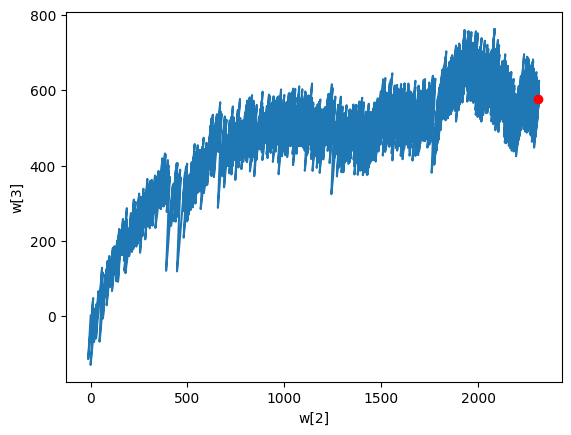

In [ ]:
w2 = []
w3 = []
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

<h1>스케일을 조전하기 위한 방법</h1>
<p>스케일 조정 방법은 다양하지만 신경망에서는 표준화를 자주 사용한다.<br>
표준화는 특성값에서 평균을 빼고 표준편차로 나누면 된다.</p>

In [ ]:
# mean = 평균
# std = 표준편차
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

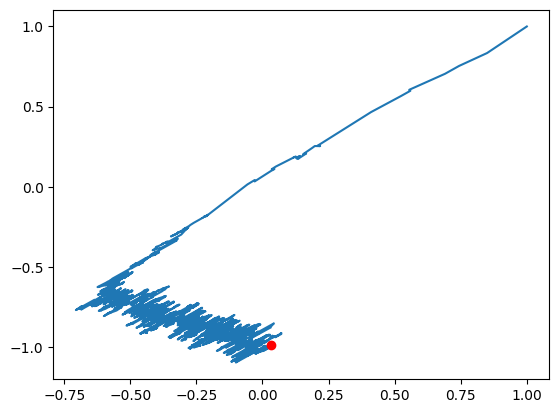

In [ ]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')

In [ ]:
# 검증세트로 모델의 성능 평가
layer2.score(x_val, y_val)

0.37362637362637363

위에 모델의 성능이 매우 낮게 나온 이유는 검증세트의 스케일을 바꾸지 않았지 때문입니다.

In [ ]:
# 스케일 적용전 데이터
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean)/val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

<h1>스케일 조정후 실수하기 쉬운 함정</h1>

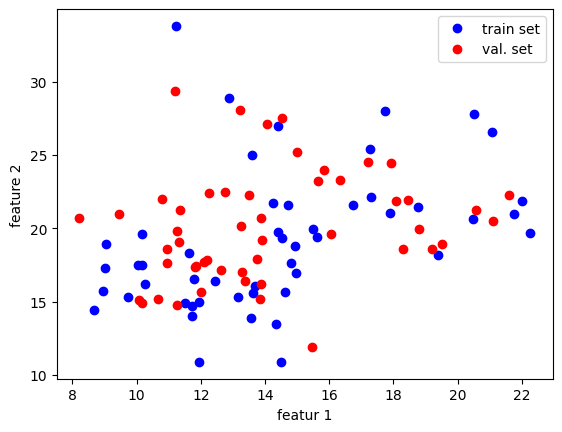

In [ ]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('featur 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

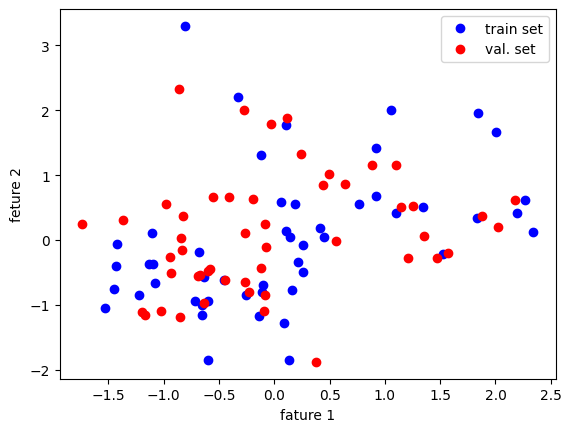

In [ ]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('feture 2')
plt.legend(['train set', 'val. set'])
plt.show()

<h3>위에 1번째 산점도와 2번째 산점도를 보면 미세하지만 훈련세트와 검증세트가 각각 다른 비율로 변환된것을 볼 수 있다. 데이터를 제대로 전처리했다면 훈련 세트와 검증 세트의 거리가 그대로 유지되어야 한다. 하지만 훈련세트와 검증 세트가 다른 비율로 전처리되었기 때문에 오차가 생긴것이다.</h3>

<h1>올바르게 검증 세트 전처리하기</h1>
<p>검증세트의 스케일이 훈련세트의 스케일과 다른 비율로 조정되면 모델에 적용된 알고리즘이 샘플 데이터를 잘못 인식하게 된다. 따라서 검증세트 뿐만아니라 테스트 세트와 모델에 실전에 투입하여 새로운 샘플을 처리 할때도 같은 비율로 전처리 해야 한다!!!</p>

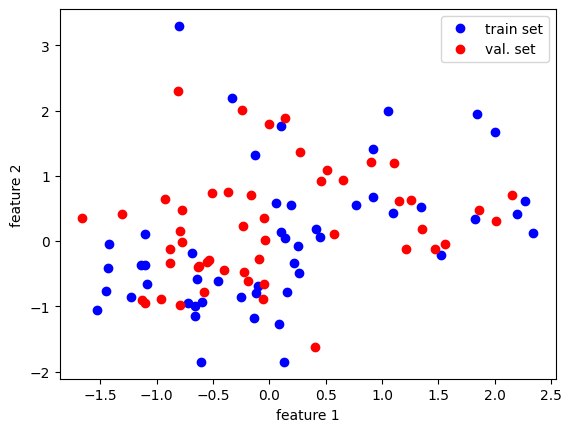

In [ ]:
# 훈련세트의 평균, 표준편차를 사용하여 변환하기
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [ ]:
layer2.score(x_val_scaled, y_val)

0.978021978021978

<h1>적절한 편향-분산 트레이드오프를 선택하기</h1>

In [ ]:
class SingleLayer:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses=[]
    self.w_history = []
    self.val_losses=[]
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 정방향 계산
    return  z

  def backprop(self, x, err):
    w_grad = x * err    # 가중치 업데이트
    b_grad = 1 * err    # 절편 업데이트
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    self.w = np.ones(x.shape[1])    # 가중치 초기화
    self.b = 0      # 절편 초기화
    self.w_history.append(self.w.copy()) # 가중치 기록
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))   # 인덱스 섞기
      for i in indexes:           # 모든 샘플에 대해 반복
        z = self.forpass(x[i])    # 정방향 계산
        a = self.activation(z)    # 활성화 함수 적용
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= self.lr * w_grad
        self.b -= b_grad

        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)

        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val, y_val)

  def activation(self, z):
    z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0        # z가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 z가 0 보다 작으면 시그모이드 함수 출력값도 0.5보다 작다.

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

In [ ]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

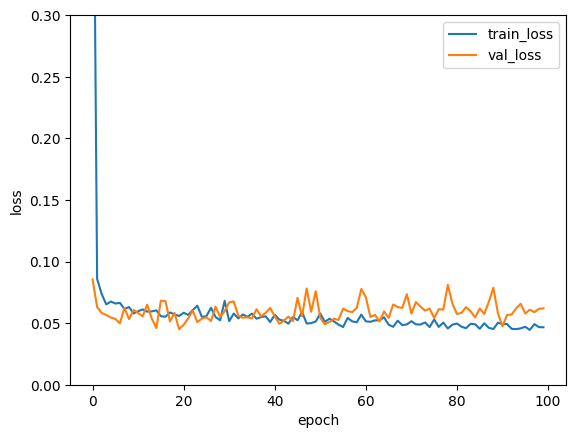

In [ ]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

<h3>위에 그래프를 보니 20번째 이후부터 검증손실이 훈련세트보다 높아지는것을 알 수 있다. 가중치는 훈련세트에 잘 맞게 되지만 검증 세트에는 잘 맞지 않게 된다 이 모델은 20번의 에포크 이후에는 훈련할 필요가 없다.</h3>

In [ ]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)
# 과대적합되기 전에 훈련을 멈춰 검증세트의 성능이 조금 더 향상되었다.

0.978021978021978

<h1>L1, L2 규제</h1>
<h3>모델이 몇 개의 데이터에 집착하지 않도록 규제를 사용하여 가중치를 제한할 수 있다.</h3>

In [ ]:
class SingleLayer:
  def __init__(self, learning_rate = 0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses=[]
    self.w_history = []
    self.val_losses=[]
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 정방향 계산
    return  z

  def backprop(self, x, err):
    w_grad = x * err    # 가중치 업데이트
    b_grad = 1 * err    # 절편 업데이트
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    self.w = np.ones(x.shape[1])    # 가중치 초기화
    self.b = 0      # 절편 초기화
    self.w_history.append(self.w.copy()) # 가중치 기록
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))   # 인덱스 섞기
      for i in indexes:           # 모든 샘플에 대해 반복
        z = self.forpass(x[i])    # 정방향 계산
        a = self.activation(z)    # 활성화 함수 적용
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        # 그레이디언트에서 페널티 항의 미분값을 더합니다.
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w -= self.lr * w_grad
        self.b -= b_grad

        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)

        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val, y_val)

  def activation(self, z):
    z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0        # z가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 z가 0 보다 작으면 시그모이드 함수 출력값도 0.5보다 작다.

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())
  def reg_loss(self):
    # w값을 업데이트하기 위한것이 아니기 때문에 미분한 값이 아닌 규제의 원래 식을 리턴한다.
    return self.l1 * np.sum(np.abs(self.w)) + self.l2/2 * np.sum(self.w**2)

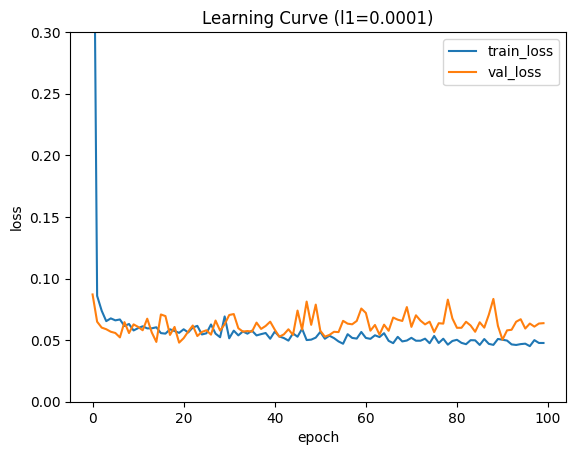

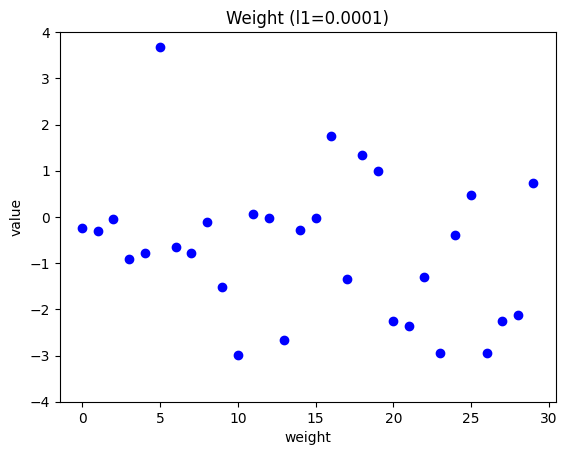

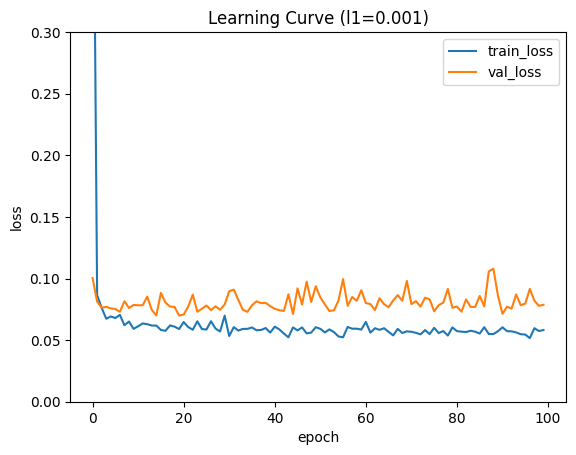

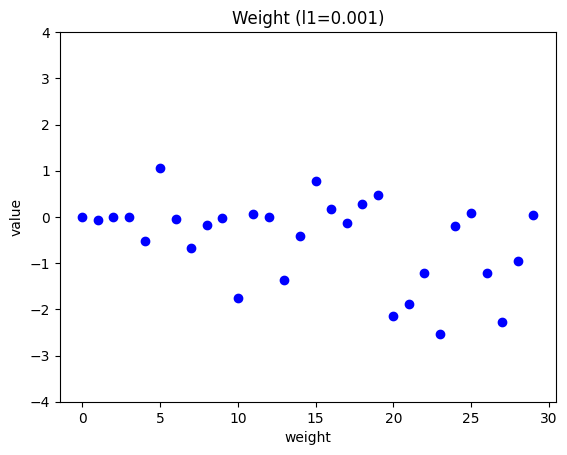

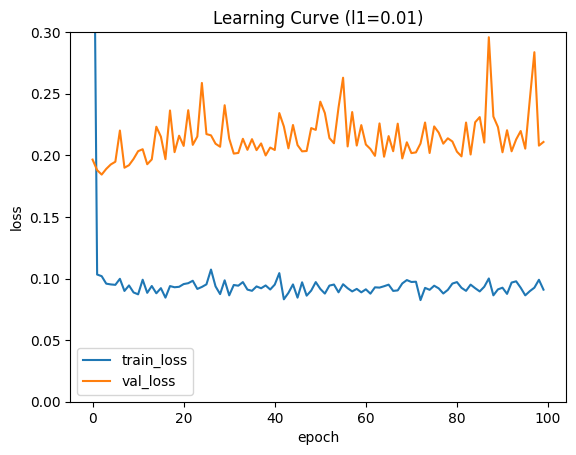

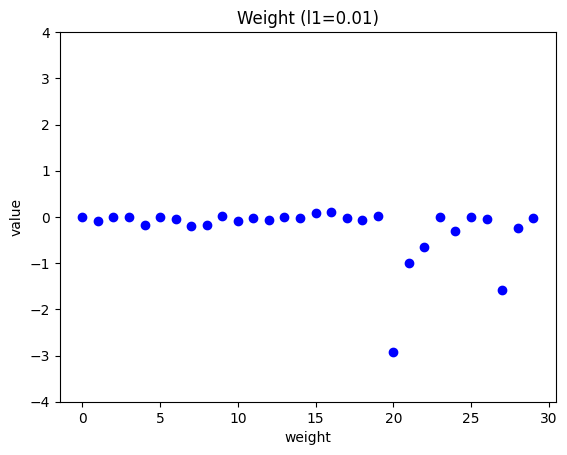

In [ ]:
# L1 규제 적용
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [ ]:
# 가장 적절한 l1값은 0.001이다.
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

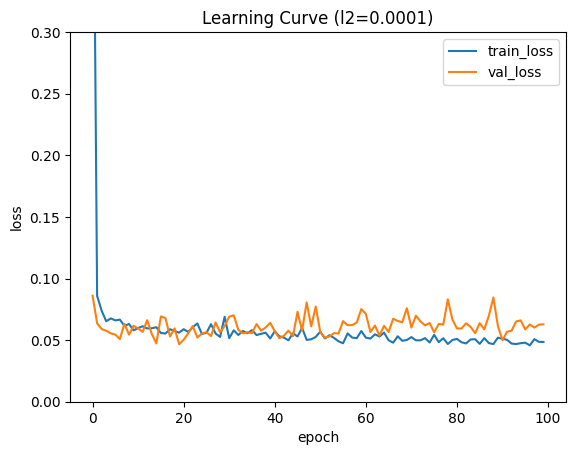

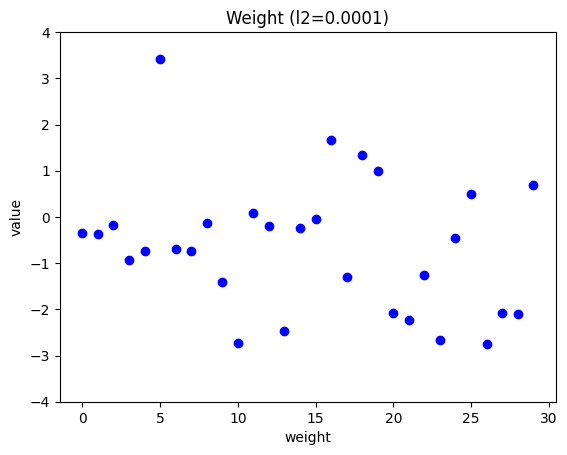

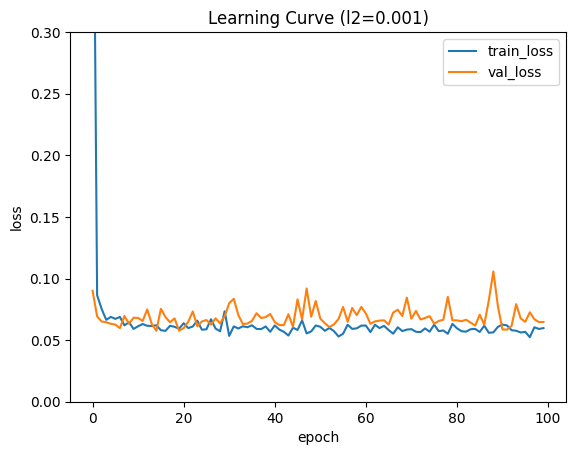

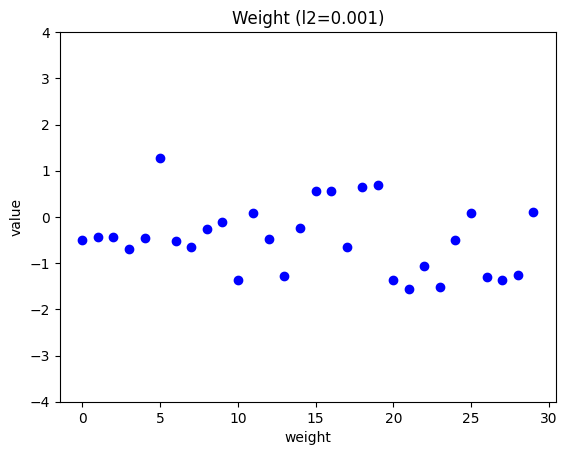

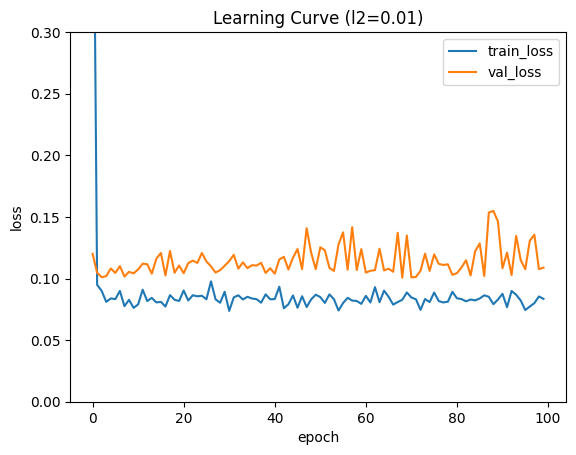

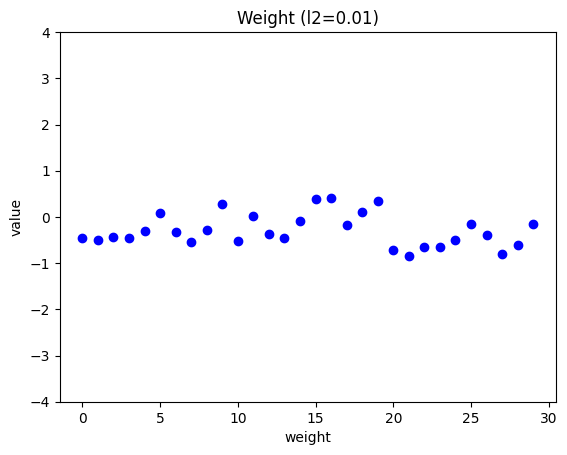

In [ ]:
# L2 규제 적용
# L1 규제 적용
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [ ]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [ ]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

<h1>SGDClassifier에서 규제사용하기</h1>

In [ ]:
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

<h1>k-폴드 교차 검증 구현</h1>
<h3>검증세트를 훈련세트에 포함되어 훨씬더 많은 양의 데이터를 학습시킬 수 있다.</h3>

In [ ]:
# 각 폴드의 검증점수를 저장하기 위한 리스트
validation_scores=[]

# 폴더의 갯수
k = 10
bins = len(x_train) // k

for i in range(k):
  start = i*bins
  end = (i+1)*bins
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index = list(range(0, start)) + list(range(end, len(x_train)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  # mean 평균 std 표준편차
  train_mean = np.mean(train_fold, axis=0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std

  lyr = SingleLayer(l2=0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

0.9583333333333333


<h1>사이킷런으로 교차검증 하기</h1>

In [ ]:
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))
# 낮게 나온 이유는 표준화 전처리를 수행하지 않았기 때문이다.

0.850096618357488


In [ ]:
# Pipeline클래스를 사용해 전처리 단계에서 검증세트가 누설도지 않도록 하기
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# pipeline으로 StandardScaler와 sgd를 클래스로 감싼다.
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv = 10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


In [ ]:
# 위에 cross_validate함수에 return_train_score매개변수를 True로 설정하면 훈련 폴드의 점수도 얻을 수 있습니다.
# 훈련폴드의 점수란 각 훈련폴드로 훈련하였을때 그 모델의 성능을 말한다.
print(np.mean(scores['train_score']))

0.9875478561631581
